In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## 1.
Dado un conjunto de datos de una dimensión $X = {-5.0, 23.0, 17.6, 7.23, 1.11 }$ normalizar usando:
1. Min_max normalizacion en el Intervalo [-1,1]
2. Desviación estandar
3. Escala decimal en el intervalo [-1,1]
4. Comparar los resultados y discutir ventajas y desventajas.

In [2]:
# Datos originales
X = np.array([-5.0, 23.0, 17.6, 7.23, 1.11])

# 1. Normalización en el intervalo [-1.1]
normalizados_min_max = (X - X.min()) / (X.max() - X.min()) *(1 -(-1)) + (-1)

# 2. Desviación Estándar (Z-Score)
normalizados_z_score = (X - X.mean()) / X.std()

# 3. Escala Decimal en el Intervalo [-1,1]
# Se elige "j" de manera que 23 dividido por 10^j es menor que 1
# En este caso con j = 2 se cumple el requisito
j=2 
escala_decimal = (X - X.mean()) / (10 ** j)


# Resultados
print("Min-Max Normalizado:")
print(normalizados_min_max)

print("\nDesviación Estándar:")
print(normalizados_z_score)

print("\nEscala Decimal:")
print(escala_decimal)

Min-Max Normalizado:
[-1.          1.          0.61428571 -0.12642857 -0.56357143]

Desviación Estándar:
[-1.33779582  1.37893488  0.85499396 -0.15116666 -0.74496637]

Escala Decimal:
[-0.13788  0.14212  0.08812 -0.01558 -0.07678]


**Normalización Min-Max en el Intervalo [-1,1]:**

*   Ventajas:
    *   Mapea los datos al rango específico deseado ([-1, 1]) y es fácil de entender.
    *   Los datos normalizados estarán dentro de un rango fijo, lo que puede ser útil en algunos casos.
*   Desventajas:
    * Sensible a valores atípicos: Si hay valores extremos en los datos, pueden distorsionar la escala de la normalización.


**Desviación Estándar (Z-Score):**

*   Ventajas:
    *   Escala los datos en función de la distribución de los datos, lo que lo hace menos sensible a valores atípicos.
*   Desventajas:
    *   No tiene un rango específico, por lo que no lo ajusta a de -1 a 1 directamente.


**Escala Decimal en el Intervalo [-1,1]:**

*   Ventajas:
    *   Permite ajustar la precisión decimal, lo que puede ser útil cuando la precisión es importante.
    *   Escala los datos en función de la distribución de los datos, como en desviación Estándar (Z-Score).
*   Desventajas:
    *   Requiere elegir un valor para el factor de escala decimal (en el ejemplo, se usó 10^2)

## 2.
Dado un conjunto de datos de 4 dimensiones con valores perdidos:
| I1 | I2 | I3 | I4 |
|:--:|:--:|:--:|:--:|
|  0 |  1 |  1 |  2 |
|  2 |  1 |  ? |  1 |
|  1 |  ? |  ? |  0 |
|  ? |  2 |  1 |  ? |
|  2 |  2 |  1 |  0 |

1. Dado que el dominio para todos los atributos es [0,1,2] ¿Cuál debe ser el número de ejemplos
“artificiales” si los valores perdidos son interpretados como “no importa el valor” y ellos son
remplazados con todos los posibles valores para su dominio.
2. ¿cuál otro método utilizaría para remplazar los valores pérdidos?

### Desarrollo
1. Si los valores perdidos son cualquiera de los valores perdidos marcados como '?' se toman como cualquier valor en el rango de $[0,1,2]$ los valores "artificales" serían 4. Ser vería por ejemplo así el nuevo dataset:

In [34]:
# dejar una semilla para siempre obtener el mismo resultado
random.seed(1)
# crear data frame
df = pd.DataFrame([[0,1,1,2],[2,1,'?',1],[1,'?','?',0],['?',2,1,'?'],[2,2,1,0]],columns=['I1','I2','I3','I4'])
# remplazar con un valor aleatorio de entre 0, 1 y 2
df.replace('?',random.choice([0,1,2]),inplace=True)
df

,I1,I2,I3,I4
0,0,1,1,2
1,2,1,0,1
2,1,0,0,0
3,0,2,1,0
4,2,2,1,0


2. Se podría usar la media de ese atributo por ejemplo, como se ve a continuacion :

In [20]:
df = pd.DataFrame([[0,1,1,2],[2,1,'?',1],[1,'?','?',0],['?',2,1,'?'],[2,2,1,0]],columns=['I1','I2','I3','I4'])
# remplazar con un valor aleatorio de entre 0, 1 y 2
df.replace('?',np.nan,inplace=True)
means = df.mean()
means

I1    1.25
I2    1.50
I3    1.00
I4    0.75
dtype: float64

In [21]:
df.replace(np.nan,means)

,I1,I2,I3,I4
0,0.00,1.0,1.0,2.00
1,2.00,1.0,1.0,1.00
2,1.00,1.5,1.0,0.00
3,1.25,2.0,1.0,0.75
4,2.00,2.0,1.0,0.00


También puede ser con la moda

In [45]:
df = pd.DataFrame([[0,1,1,2],[2,1,'?',1],[1,'?','?',0],['?',2,1,'?'],[2,2,1,0]],columns=['I1','I2','I3','I4'])
# remplazar con un valor aleatorio de entre 0, 1 y 2
df.replace('?',np.nan,inplace=True)
modes = df.mode()
modes

,I1,I2,I3,I4
0,2.0,1.0,1.0,0.0
1,NaN,2.0,NaN,NaN


La moda de I1 es 2, la de I2 puede ser 1 or 2, la moda de I3 es 1 y la de I4 0

In [46]:
df.replace(np.nan,modes.iloc[0])

,I1,I2,I3,I4
0,0.0,1.0,1.0,2.0
1,2.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.0
3,2.0,2.0,1.0,0.0
4,2.0,2.0,1.0,0.0


## 3.
El número de hijos de diferentes pacientes es dado por el siguiente vector:$
C = {3, 1, 0, 2, 7, 3, 6, 4, −2, 0, 0, 10, 15, 6}$
1. Encontrar “outliers” usando parámetros estadisticos estándar: media y varianza
    
    a. Si el umbral cambia de ±3 desviaciones estandar a ±2 desviaciones estandar , ¿Cuál
    “outlier adicional” se encuentra?

In [29]:
# Definir el vector C
C = np.array([3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6])

# Calcular la media y la desviación estándar
media = np.mean(C)
desviacion_estandar = np.std(C)

print('media: ', media)
print('desviacion estandar: ', desviacion_estandar)

media:  3.9285714285714284
desviacion estandar:  4.4153027030073115


1. Para encontrar los outliers usando el criterio de ±3 desviaciones estándar, consideraremos como outliers aquellos valores que estén a más de 3 desviaciones estándar de la media.

Con el umbral definido para ±3 desviaciones estándar, analizaremos si hay outliers en los datos

In [45]:
# Identificar los outliers con ±3 desviaciones estándar
umbral = 3 * desviacion_estandar

result = []
menosUmbral = media - umbral
masUmbral = media + umbral
for c in C:
        #analizar si están por fuera de los rangos con + o - 3 desviaciones estándar
        if c > masUmbral or c < menosUmbral:
                result.append((c, menosUmbral, masUmbral, 'Si'))
                
        else:
                result.append((c, menosUmbral, masUmbral, 'No' ))

df = pd.DataFrame(result, columns=['# Hijos', '-3 Desviaciones', '+3 Desviaciones', 'Outlier?'])
df            

,# Hijos,-3 Desviaciones,+3 Desviaciones,Outlier?
0,3,-9.317337,17.17448,No
1,1,-9.317337,17.17448,No
2,0,-9.317337,17.17448,No
3,2,-9.317337,17.17448,No
4,7,-9.317337,17.17448,No
5,3,-9.317337,17.17448,No
6,6,-9.317337,17.17448,No
7,4,-9.317337,17.17448,No
8,-2,-9.317337,17.17448,No
9,0,-9.317337,17.17448,No


Usando el criterio de ±3 desviaciones estándar no se encuentran outliers en el conjunto de datos

Con el umbral definido para ±2 desviaciones estándar, analizaremos si hay outliers en los datos

In [49]:
# Identificar los outliers con ±3 desviaciones estándar
umbral = 2 * desviacion_estandar

result = []
menosUmbral = media - umbral
masUmbral = media + umbral
for c in C:
        #analizar si están por fuera de los rangos con + o - 3 desviaciones estándar
        if c > masUmbral or c < menosUmbral:
                result.append((c, menosUmbral, masUmbral, 'Si'))
                
        else:
                result.append((c, menosUmbral, masUmbral, 'No' ))

df = pd.DataFrame(result, columns=['# Hijos', '-3 Desviaciones', '+3 Desviaciones', 'Outlier?'])
df 

,# Hijos,-3 Desviaciones,+3 Desviaciones,Outlier?
0,3,-4.902034,12.759177,No
1,1,-4.902034,12.759177,No
2,0,-4.902034,12.759177,No
3,2,-4.902034,12.759177,No
4,7,-4.902034,12.759177,No
5,3,-4.902034,12.759177,No
6,6,-4.902034,12.759177,No
7,4,-4.902034,12.759177,No
8,-2,-4.902034,12.759177,No
9,0,-4.902034,12.759177,No


Usando el criterio de ±2 desviaciones estándar se encuentra que el valor 15 es un outlier, ya que está por fuera del rango.
Comparando con el umbral de 3 desviaciones estándar, como se reduce el rango, es más posible que se detecten outliers

## 4. 
Dado un conjunto de tres dimensiones,
X=[{1,2,0},{3,1,4},{2,1,5},{0,1,6},{2,4,3},{4,4,2},{5,2,1},{7,7,7},{0,0,0},{3,3,3}]
1. Describir el procedimiento e interpretar los resultados de detección de outliers basado en la
media y varianza

In [107]:
df = pd.DataFrame([[1,2,0],[3,1,4],[2,1,5],[0,1,6],[2,4,3],[4,4,2],[5,2,1],[7,7,7],[0,0,0],[3,3,3]],columns=['x1','x2','x3'])
df

,x1,x2,x3
0,1,2,0
1,3,1,4
2,2,1,5
3,0,1,6
4,2,4,3
5,4,4,2
6,5,2,1
7,7,7,7
8,0,0,0
9,3,3,3


Se calcula la media para cada dimension

In [51]:
means = df.mean()
means

x1    2.7
x2    2.5
x3    3.1
dtype: float64

Luego las varianzas para cada dimension

In [112]:
variances = df.var()
variances

x1    4.900000
x2    4.277778
x3    5.877778
dtype: float64

Se usa el método apply para aplicar a todas las columnas una mascara que remplaza por NAN aquellos valores que son outliers, es decir que sean mayores que media+2*varianza o menores que media-2*varianza. 

In [111]:
def func(col):
    mean = means[col.name]
    variance = variances[col.name]
    col_new = col.mask(col<=mean-2*variance,np.nan)
    col_new = col.mask(col_new>=mean+2*variance,np.nan)
    return col_new

df.apply(func,axis=0)

,x1,x2,x3
0,1,2,0
1,3,1,4
2,2,1,5
3,0,1,6
4,2,4,3
5,4,4,2
6,5,2,1
7,7,7,7
8,0,0,0
9,3,3,3


Al parecer en este dataset no se reconocieron outliers

## 5. 
En Weka cargar el conjunto de datos iris.
1. Eliminar manualmente valores (15 %) en sus atributos, para simular valores perdidos. Luego
aplicar varios métodos que estan en weka para remplazar esos valores perdidos. Discutir las
diferencias entre el valor real y el que valor que lo remplaza, y las diferencias entre los métodos.
2. Normalizar usando varios metodos.
3. Discretizar usando varios métodos

### Cargando el datase
![Alt text](image.png)

### Eliminando valores manualmente
![Alt text](image-1.png)


### Datos originales

![Alt text](image-2.png)

### Datos con valores faltantes

![Alt text](image-3.png)

Usando la opción de **ReplaceMissingWithUserConstant**, permite definir un valor fijo para los valores faltantes. Se puede aplicar a los atributos que se quieran seleccionar

![Alt text](image-6.png)

Resultado:

![Alt text](image-7.png)



Usando la opción de **ReplaceMissingValues**, el programa utiliza la media o mediana para completar los datos

![Alt text](image-8.png)

Resultado:

![Alt text](image-9.png)



Usando la opción **RemoveWithValues**, Elimina todos los registros que tengan datos flatantes, en este caso se uso 0 como missing value

![Alt text](image-11.png)


Resultado:

![Alt text](image-10.png)



*   ReplaceMissingWithUserConstant (Reemplazar con una constante proporcionada por el usuario): Este método se utiliza cuando se desea sustituir los valores faltantes con una constante predefinida. Puede ser útil si el usuario conoce la constante que mejor se ajusta para completar los datos. Sin embargo, si no se elige una constante adecuada, esto puede afectar a todas las medidas de tendencia central al asignar un valor arbitrario. Un problema potencial de este método es que, al comparar los valores con la constante, algunos podrían ser considerados como valores atípicos, lo que aumenta el riesgo de generar outliers.

*   ReplaceMissingValues (Reemplazar con la media o la mediana): Este método reemplaza los valores faltantes por la media o la mediana del conjunto de datos. El programa decide automáticamente si se utiliza la media o la mediana. Al comparar los resultados de este método con los valores originales de la tabla, se observa que no están tan alejados de los valores reales. Esta puede ser la mejor opción para completar datos, ya que no afecta significativamente la distribución de los datos y los valores completados quedan en un punto medio. Esto evita que se vean afectadas las técnicas de minería de datos que se apliquen posteriormente.

*   RemoveWithValues (Eliminar registros con valores faltantes): En ciertos casos, es preferible eliminar los registros que contienen datos faltantes, por ejemplo, cuando la distribución de los datos es uniforme. Con este método, se eliminan todos los registros que coincidan con un valor dado, como se hizo en el ejercicio con el valor 0. La desventaja de este método es que se pueden perder otros atributos importantes del conjunto de datos y con estos, conocimiento valioso. En el ejemplo, se resujo el número de registros de 150 a 73 que es casi el 50%

###  Normalización del dataset

Datos originales:

![Alt text](image-12.png)

**Normalizando con Min-Max**: Usando el filtro de Normalize para dejar los datos entre 0 y 1

Filtro:

![Alt text](image-13.png) 

También se puede usar en expresión matemática:

![Alt text](image-15.png)

Resultado:

![Alt text](image-14.png)

Este filtro permite Noralizar los datos en una escala indicada. Por defecto está establecida de 0 a 1.
Este filtro utiliza el método Min-Max donde normalizado = (X - Min) / (Max - Min), X es el valor original de la caracteristica

**Noramlización con logaritmo**: Teniendo en cuenta que todos los valores para los atributos numéricos del dataset son positivos (log no se puede aplicar a datos negativos), otra normalización que podemos usar es la logarítmica. Esta normalización se puede usar para reducir el impacto de outlier que tienen valores muy altos o yambién cuando la distribuciñon de los datos es asimétrica o sesgada

Filtro:

![Alt text](image-17.png)

Resultado:

![Alt text](image-16.png)


**Normalizando por Z-score**: Usamos esta normalización cuando queremos que los datos dengan una media de 0 y desviaciñon estandar de 1. Esta noramlozaciñon se usa cuando la distribución de los datos es normal
Para aplicar esta normalización, usaremos el filtro de **standarize**

Filtro:

![Alt text](image-18.png)

Resultado:

![Alt text](image-19.png)

### Discretización: 

**Equal Frequency Binning**: Esta técnica divide los valores en intervalos de manera que cada intervalo contenga aproximadamente el mismo número de instancias, la podemos encontrar útil cuando se tienen datos desequilibrados.

Filtro:

![Alt text](image-20.png)

Resultados de la discretización:

Antes:
![Alt text](image-21.png)

Después: 
![Alt text](image-23.png)

Como podemos observar, el algoritmo define los rangos tratando de igualar las frecuencias. Esto puede ser útil cuando se desea tener los datos organizados y equilibrados lo mejor posible. Esta discretización es robusta ante datos atípicos, ya que estos tienden a quedar en los mismo intervalos y no afecta tanto la distribución.

**Unsupervised Discretization K-means**: Sirve para agrupar datos sin necesidad de tener una clase. Este método es sensible a la distribución de los datos, por lo que tiende a crear intervalos más pequeños donde los datos están más agrupados e intervalos más grandes donde los datos están dispersos

Filtro:
![Alt text](image-24.png)


![Alt text](image-25.png)
![Alt text](image-26.png)

En los resultados de esta discretización, el programa muestra de forma general información del dataset.

*   Number of iterations: Es el nuemero de iteraciones que el algoritmo necesita para definir los clusters
*   Initial starter points: Representan los centroides (los puntos equidistante de los puntos del cluster) de cada clase generados aleatoriamente en el paso inicial.
*   Final cluster centroids: Muestra los datos fijos para cada cluster al final del proceso 


Para este algoritmo hay que tener cuidado con la selección del número de clusters que se desean generar, ya que si se dejan pocos cluster, se puede perder información y, si por el contrario, se dejan desmasiados clusters, esto puede provovar una sobrediscretización (aumentando la granularidad), agregando complejidad innecesaria y generando ruido.
Este algorimo es sensible a outliers

<!-- Resultado:

=== Run information ===

Scheme:       weka.clusterers.SimpleKMeans -init 0 -max-candidates 100 -periodic-pruning 10000 -min-density 2.0 -t1 -1.25 -t2 -1.0 -N 3 -A "weka.core.EuclideanDistance -R first-last" -I 500 -num-slots 1 -S 10
Relation:     iris
Instances:    150
Attributes:   5
              sepallength
              sepalwidth
              petallength
              petalwidth
              class
Test mode:    evaluate on training data


=== Clustering model (full training set) ===


kMeans
======

Number of iterations: 3
Within cluster sum of squared errors: 7.817456892309574

Initial starting points (random):

Cluster 0: 6.1,2.9,4.7,1.4,Iris-versicolor
Cluster 1: 6.2,2.9,4.3,1.3,Iris-versicolor
Cluster 2: 6.9,3.1,5.1,2.3,Iris-virginica

Missing values globally replaced with mean/mode

Final cluster centroids:
                                          Cluster#
Attribute                Full Data               0               1               2
                           (150.0)          (50.0)          (50.0)          (50.0)
==================================================================================
sepallength                 5.8433           5.936           5.006           6.588
sepalwidth                   3.054            2.77           3.418           2.974
petallength                 3.7587            4.26           1.464           5.552
petalwidth                  1.1987           1.326           0.244           2.026
class                  Iris-setosa Iris-versicolor     Iris-setosa  Iris-virginica




Time taken to build model (full training data) : 0 seconds

=== Model and evaluation on training set ===

Clustered Instances

0       50 ( 33%)
1       50 ( 33%)
2       50 ( 33%) -->



## 6.
Dado el conjunto de datos:
| I1 |  I2 |  I3 |
|:--:|:---:|:---:|
|  1 | 5.9 | 3.4 |
|  2 | 2.1 | 6.2 |
|  1 | 1.6 | 2.8 |
|  2 | 6.8 | 5.8 |
|  1 | 3.1 | 3.1 |
| 1  | 8.3 | 4.1 |
| 2  | 2.4 | 5.0 |

Realizar reducción de valores basado en la técnica de BIN con el mejor corte para lo siguiente
(mostrar pasos):
1. Dimensión I2 usando la media como representantes de 2 BINS
2. Dimensión I3 usando el limite más cercano como representante de 2 BINS

1. primero creamos un dataframe y se ordena de acuerdo a los valores de la variable 2. 

In [195]:
df = pd.DataFrame([[1, 5.9 ,3.4],[ 2 ,2.1,6.2 ],[ 1 , 1.6 , 2.8 ],[ 2 , 6.8 , 5.8 ],[1 ,3.1 , 3.1],[1  , 8.3 , 4.1],[2  , 2.4 ,5.0]],columns=['I1','I2','I3'])
df

,I1,I2,I3
0,1,5.9,3.4
1,2,2.1,6.2
2,1,1.6,2.8
3,2,6.8,5.8
4,1,3.1,3.1
5,1,8.3,4.1
6,2,2.4,5.0


In [196]:
df.sort_values(by='I2',inplace=True,ignore_index=True)
df

,I1,I2,I3
0,1,1.6,2.8
1,2,2.1,6.2
2,2,2.4,5.0
3,1,3.1,3.1
4,1,5.9,3.4
5,2,6.8,5.8
6,1,8.3,4.1


Para decidir si 3.1 va en el primer bin o en el segundo, miramos la distancia al ultimo valor del bin 1 ( d= 0.7 )y el primer valor del bin 2 ( d= 2.8 ), ya que la distancia al ultimo valor del primer bin es menor, lo asignamos a ese bin. 

In [197]:
df_bin1 = df.iloc[:4,:].copy()
df_bin1

,I1,I2,I3
0,1,1.6,2.8
1,2,2.1,6.2
2,2,2.4,5.0
3,1,3.1,3.1


In [198]:
df_bin2 = df.iloc[4:,:].copy()
df_bin2

,I1,I2,I3
4,1,5.9,3.4
5,2,6.8,5.8
6,1,8.3,4.1


Ya que queremos usar la media para discretizar, calculamos la media para cada bin y reemplazamos los valores en el dataset original, asi obtendriamos valroes discretizados para la variable I2

In [199]:
bin_1_mean = df_bin1.mean()
bin_2_mean = df_bin2.mean()

In [200]:
df['I2']= df.index.map(lambda x: bin_1_mean['I2'] if x<4 else bin_2_mean['I2'])

In [201]:
df

,I1,I2,I3
0,1,2.3,2.8
1,2,2.3,6.2
2,2,2.3,5.0
3,1,2.3,3.1
4,1,7.0,3.4
5,2,7.0,5.8
6,1,7.0,4.1


2. Para discretizar la variable I3, ordenamos el dataset de acuerdo a los valores presentes en I3

In [202]:
df.sort_values(by='I3',inplace=True,ignore_index=True)
df

,I1,I2,I3
0,1,2.3,2.8
1,1,2.3,3.1
2,1,7.0,3.4
3,1,7.0,4.1
4,2,2.3,5.0
5,2,7.0,5.8
6,2,2.3,6.2


De nuevo el valor 4.1 es más cercano a 3.4 por lo que se asigna al bin 1. 

In [214]:
df_bin1 = df.iloc[:4,:].copy()
df_bin1

,I1,I2,I3
0,1,2.3,2.8
1,1,2.3,3.1
2,1,7.0,3.4
3,1,7.0,4.1


In [219]:
df_bin2 = df.iloc[4:,:].copy()
df_bin2

,I1,I2,I3
4,2,2.3,5.0
5,2,7.0,5.8
6,2,2.3,6.2


Para asignar los valores tomamos los extremos, 2.8 y 4.1 en el caso del bin 1 y si el valor es más cercano a 2.8 se asigna ese valor, de lo contrario se asigna 4.1. Lo mismo se haría para el bin 2, solo que los extremos tienen valroes 5 y 6.2

In [215]:
df_bin1['I3'] = df_bin1['I3'].apply(lambda x: 2.8 if abs(x-2.8)<abs(x-4.1) else 4.1 )

In [216]:
df_bin1

,I1,I2,I3
0,1,2.3,2.8
1,1,2.3,2.8
2,1,7.0,2.8
3,1,7.0,4.1


In [220]:
df_bin2['I3'] = df_bin2['I3'].apply(lambda x: 5 if abs(x-5)<abs(x-6.2) else 6.2 )

In [221]:
df_bin2

,I1,I2,I3
4,2,2.3,5.0
5,2,7.0,6.2
6,2,2.3,6.2


Finalmente se une el resultado

In [223]:
df_total = pd.concat([df_bin1,df_bin2])
df_total

,I1,I2,I3
0,1,2.3,2.8
1,1,2.3,2.8
2,1,7.0,2.8
3,1,7.0,4.1
4,2,2.3,5.0
5,2,7.0,6.2
6,2,2.3,6.2


## 7. 
Dado el conjunto de datos con tres dimensiones de entrada y una dimension representando la clase:
|  I1 |  I2 |  I3 | C |
|:---:|:---:|:---:|---|
| 2.5 | 1.6 | 5.9 | 0 |
| 7.2 | 4.3 | 2.1 | 1 |
| 3.4 | 5.8 | 1.6 | 1 |
| 5.6 | 3.6 | 6.8 | 0 |
| 4.8 | 7.2 | 3.1 | 1 |
| 8.1 | 4.9 | 8.3 | 0 |
| 6.3 | 4.8 | 2.4 | 1 |

Hacer el ranking de las dimensiones realizando comparación de medias y varianzas

In [3]:
df = pd.DataFrame([[2.5 , 1.6 , 5.9 , 0 ],
                   [7.2 , 4.3 , 2.1 , 1 ],
                   [3.4 , 5.8 , 1.6 , 1 ],
                   [5.6 , 3.6 , 6.8 , 0 ],
                   [4.8 , 7.2 , 3.1 , 1 ],
                   [8.1 , 4.9 , 8.3 , 0 ],
                   [6.3 , 4.8 , 2.4 , 1 ]],
                   columns=["I1", "I2", "I3", "C"])

df

,I1,I2,I3,C
0,2.5,1.6,5.9,0
1,7.2,4.3,2.1,1
2,3.4,5.8,1.6,1
3,5.6,3.6,6.8,0
4,4.8,7.2,3.1,1
5,8.1,4.9,8.3,0
6,6.3,4.8,2.4,1


Primero lo que debemos hacer es agrupar loas atributos por la variable categórica y calcular sus medias y varianzas

In [4]:
means = df.groupby("C").mean()
variances = df.groupby("C").var()

print("Medias por clasificación:")
print(means)
print("---------------------------------\n")

print("Varianzas por clasificación:")
print(variances)
print("---------------------------------\n")


Medias por clasificación:
      I1        I2   I3
C                      
0  5.400  3.366667  7.0
1  5.425  5.525000  2.3
---------------------------------

Varianzas por clasificación:
       I1        I2        I3
C                            
0  7.8700  2.763333  1.470000
1  2.8025  1.635833  0.393333
---------------------------------



El siguiente paso es hacer la comparación de medias y varianzas por cada clase, esto con el fin de determinar cuál atributo tiene el cambio más significativo entre las clases

In [5]:
# Calcular la diferencia absoluta entre los medias de 0 vs 1 para cada atributo
dif_means = (means.loc[1] - means.loc[0]).abs()

print("Diferencia entre las medas de la clase para cada atributo:")
print(dif_means)

Diferencia entre las medas de la clase para cada atributo:
I1    0.025000
I2    2.158333
I3    4.700000
dtype: float64


In [6]:
# Calcular la diferencia absoluta entre las varianzas de 0 vs 1 para cada atributo
dif_var = (variances.loc[1] - variances.loc[0]).abs()

print("Diferencia entre las varianzas de la clase para cada atributo:")
print(dif_var)

Diferencia entre las varianzas de la clase para cada atributo:
I1    5.067500
I2    1.127500
I3    1.076667
dtype: float64


**Armar los rankings:** Aquí hay que tener en cuenta que para las medias, se analiza diferencia y para las varianzas la similitud. Entonces, nuestro criterio para hacer el ranking es encontrar el orden de las variables que tengan la diferencia de medias más alta y la diferencia de varianzas más pequeña.

In [7]:
rank_means = dif_means.rank(ascending=False) #Se de deja ascending=False ya que queremos que las diferencias más altas ocupen los primeros lugars
rank_var = dif_var.rank()

#unir los dos rankings y calcular el ranking final para cada dimensión
final_rank = ((rank_means + rank_var) /2).rank().sort_values()

print("Ranking de importancia de las dimensiones:")
print(final_rank)

Ranking de importancia de las dimensiones:
I3    1.0
I2    2.0
I1    3.0
dtype: float64


Según las comparaciones de medias y varianzas, la dimensión I3 parece tener la diferencia más significativa entre las clases, ya que las medias son bastante diferentes y las varianzas son relativamente pequeñas en comparación con las otras dimensiones. La dimensión I2 también muestra diferencias en las medias, aunque las varianzas son similares. La dimensión I1 parece tener diferencias mínimas en las medias y varianzas.

Al final en el ranking podemos ver que la dimensión I3 es la más relevante para clasificar las clases, seguida por la dimensión I2, y terminando con la dimensión I1, parece tener menos importancia (podría ser una dimensión a eliminar).

Esto tiene sentiddo ya que si vemos el dataset original, podemos observar que en la dimensión I3, los valores para la clase 0 tienden a ser grandes y los valores pequeños a ser de la clase 1. Este patrón es más claro en esta dimensión que en las otras

## 8.
Dado el conjunto de datos X, donde X1 y X2 son dimensiones numericas, X3 y X4 son dimensiones
con datos categoricos 

|  X1 |  X2 | X3 | X4 |
|:---:|:---:|:--:|----|
| 2.7 | 3.4 |  1 | A  |
| 3.1 | 6.2 |  2 | A  |
| 4.5 | 2.8 |  1 | B  |
| 5.3 | 5.8 |  2 | B  |
| 6.6 | 3.1 |  1 | A  |
| 5.0 | 4.1 | 2  | B  |

1. Aplicar el método se selección de características basado en la entropía para reducir una di-
mensión (mostrar pasos).

2. Implementar un programa para realizar el “ranking” de dimensiones usando entropía.

Primero escribimos los datos en un dataframe

In [2]:
df = pd.DataFrame([[2.7,3.4,'1','A'],[3.1,6.2,'2','A'],[4.5,2.8,'1','B'],[5.3,5.8,'2','B'],[6.6,3.1,'1','A'],[5.0,4.1,'2','B']],columns=['X1','X2','X3','X4'])
df

,X1,X2,X3,X4
0,2.7,3.4,1,A
1,3.1,6.2,2,A
2,4.5,2.8,1,B
3,5.3,5.8,2,B
4,6.6,3.1,1,A
5,5.0,4.1,2,B


separamos las variables en atributos numéricos y categoricos ya que la medida de similitud es distinta dependiendo del tipo de variable

In [3]:
df_numerica = df.iloc[:,:2].copy()
df_numerica

,X1,X2
0,2.7,3.4
1,3.1,6.2
2,4.5,2.8
3,5.3,5.8
4,6.6,3.1
5,5.0,4.1


In [4]:
df_categorica = df.iloc[:,2:].copy()
df_categorica

,X3,X4
0,1,A
1,2,A
2,1,B
3,2,B
4,1,A
5,2,B


In [5]:
def similitud_categorica(df):
    matrix_ = df.to_numpy()
    n = matrix_.shape[0]
    m = matrix_.shape[1]
    similitud_categorica =np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            similitud_categorica[i][j]=(matrix_[i]==matrix_[j]).sum()/m
    return similitud_categorica

def similitud_numerica(df):
    n = df.shape[0]
    range_ = df_numerica.max()-df_numerica.min()
    distancia =np.zeros((n,n))
    D = 0
    for i in range(n):
        for j in range(n):
            diff = (df.loc[i]-df.loc[j])/range_
            distancia[i][j] = np.sqrt((diff**2).sum())
            D += distancia[i][j] 
    D = D/(n*n)
    alpha = -np.log(0.5)/D
    similitud = np.exp(-alpha*distancia)
    return similitud
def entropia_one_type(similitud):
    entropia_total = 0
    for i in range(similitud.shape[0]-1):
        for j in range(i+1,similitud.shape[0]):
            if similitud[i][j]!=0 and similitud[i][j]!=1:
                entropia_total -= (similitud[i][j]*np.log(similitud[i][j]))+((1-similitud[i][j])*np.log(1-similitud[i][j]))
    return entropia_total

def entropia_total(categorica,numerica,c=True,n=True):
    if c:
        s_c = similitud_categorica(categorica)
    
        entropia_c = entropia_one_type(s_c)
    else:
        entropia_c = 0
    if n : 
        s_n = similitud_numerica(numerica)
    
        entropia_n = entropia_one_type(s_n)
    else:
        entropia_n = 0
    entropia_total = entropia_c + entropia_n
    return entropia_total

Primero se calcula la entropia del dataset total, como se tienen dos tipos de variables, numéricas y categoricas, se usa un tipo de matriz de similitud para cada tipo de variable, se calcula la entropia para los dos tipos de varaibles por separado y se suman al final obteniendo asi una entropia total. 

In [6]:
# F = {X1,X2,X3,X4}
E_f = entropia_total(df_categorica,df_numerica)
# F_f1 = {X2,X3,X4}
E_f1 = entropia_total(df_categorica,df_numerica.iloc[:,1:])
# F_f2 = {X1,X3,X4}
E_f2 = entropia_total(df_categorica,df_numerica.iloc[:,:1])
# F_f3 = {X1,X2,X4}
E_f3 = entropia_total(df_categorica.iloc[:,1:],df_numerica)
# F_f4 = {X1,X2,X3}
E_f4 = entropia_total(df_categorica.iloc[:,:1],df_numerica)

print(f'Entropía del dataset total : {E_f}\n')
print(f'Diferencia de entropia dataset-X1 : {E_f-E_f1}\n')
print(f'Diferencia de entropia dataset-X2 : {E_f-E_f2}\n')
print(f'Diferencia de entropia dataset-X3 : {E_f-E_f3}\n')
print(f'Diferencia de entropia dataset-X4 : {E_f-E_f4}\n')

Entropía del dataset total : 15.451714274519091

Diferencia de entropia dataset-X1 : 1.445137359855849

Diferencia de entropia dataset-X2 : 1.0004990806777698

Diferencia de entropia dataset-X3 : 5.545177444479563

Diferencia de entropia dataset-X4 : 5.545177444479563



Como la diferencia de X2 es la menor, se colola primero en el ranking y se elimina esta dimension ya que es la que menos cambia la entropia al eliminarse. A continuación se implementa un proceso iterativo para crear el ranking.

In [15]:
def ranking_entropia(df):
    
    lista_inicial = list(df.keys())
    ranking = []

    while len(lista_inicial)>1: 
        differences = []
        nueva_df = df.loc[:,lista_inicial]
        numerica= nueva_df.select_dtypes(include='float64')
        categorica = nueva_df.select_dtypes(include='object')
        E_f = entropia_total(categorica,numerica)
        for n in lista_inicial:
            partial_df = nueva_df.loc[:, nueva_df.columns != n]
            numerica= partial_df.select_dtypes(include='float64')
            categorica = partial_df.select_dtypes(include='object')
            if numerica.shape[1]!=0 and categorica.shape[1]!=0:  
                E_f_nueva = entropia_total(categorica,numerica)
                diff = abs(E_f - E_f_nueva)
            elif numerica.shape[1]!=0:
                E_f_nueva = entropia_total(None,numerica,c=False,n=True)
                diff = abs(E_f - E_f_nueva)
            elif categorica.shape[1]!=0:
                E_f_nueva = entropia_total(categorica,None,c=True,n=False)
                diff = abs(E_f - E_f_nueva)
            differences.append(diff)
        print('Variables : ', lista_inicial)
        print('Diferencias de entropia : ',differences)
        element = differences.index(min(differences))
        ranking.append(lista_inicial.pop(element))
    return ranking
        
        

In [16]:
ranking = ranking_entropia(df)
print(f'El ranking de las variables encontrado es, en orden ascendente :{ranking}')

Variables :  ['X1', 'X2', 'X3', 'X4']
Diferencias de entropia :  [1.445137359855849, 1.0004990806777698, 5.545177444479563, 5.545177444479563]
Variables :  ['X1', 'X3', 'X4']
Diferencias de entropia :  [8.906037749361758, 5.545177444479563, 5.545177444479563]
Variables :  ['X1', 'X4']
Diferencias de entropia :  [8.906037749361758, 0.0]
El ranking de las variables encontrado es, en orden ascendente :['X2', 'X3', 'X4']


## 9. 
Al conjunto de datos Adult del repositorio de Machine learning:
1. Convertir todos los atributos numéricos a categóricos utilizando dos estrategias diferentes.
2. Transformar el conjunto de datos de manera que todos los atributos sean numéricos.

## 10.
Escoger un conjunto de datos del repositorio de Machine learning, que tenga varias dimensiones y
que sean numéricas, y aplicar PCA. Describir el nuevo conjunto de datos.

Solucion:

Para el conjunto de datos se escogió el dataset "Human Activity Recognition Using Smartphones"[1]. Este dataset contiene información de experimentos en 30 voluntarios con un rango de edad de 19 a 48 años. Cada persona realizó 6 tipos de actividades caminar, subir escaleras, bajar escaleras, sentarse, estar de pie, acostarse. Las actividades se hicieron usando un smartphone en la muñeca. Usando el acelerometro y giroscopio que viene integrado, obtuvieron 3 aceleraciones lineales axiales, 3 velocidades angulares axiales a una tasa constante de 50Hz.Las señales del sensor son divididas en ventanas de tiempo de 2.56 sec. Las dimensiones estan normalizadas en un rango de [-1,1], las unidades de aceleracion están en 'g's' -> 9.80665 m/seg2. Las unidades del giroscopio son de rad/seg. 

A continuacion se pueden ver las etiquetas de actividades.

In [2]:
labels = pd.read_csv('../../local_data/UCI HAR Dataset/activity_labels.txt',sep=' ',names=['Label'],index_col=0)
labels

,Label
1,WALKING
2,WALKING_UPSTAIRS
3,WALKING_DOWNSTAIRS
4,SITTING
5,STANDING
6,LAYING


A continuación se describen las variables que contienen el conjunto de datos:

Las variables de la base de datos provienen del acelerómetro y giroscopio en tres ejes, tAcc-XYZ y tGyro-XYZ. Estas señales en el dominio del tiempo (con el prefijo 't' para denotar tiempo) las capturaron a una tasa constante de 50 Hz. La señal de aceleración la separaron en señales de aceleración del cuerpo y de la gravedad (tBodyAcc-XYZ y tGravityAcc-XYZ).

La aceleración lineal del cuerpo y la velocidad angular las derivaron en el tiempo para obtener señales de Jerk (tBodyAccJerk-XYZ y tBodyGyroJerk-XYZ). También  calcularon la magnitud de estas señales tridimensionales utilizando la norma euclidiana (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag).

Aplicaron una Transformada Rápida de Fourier (FFT) a algunas de estas señales, lo que produjo fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Nota: la 'f' indica señales en el dominio de la frecuencia).

Calcularon estimaciones del vector para las variables medidas: 
- mean(): media
- std(): desviacion estandar
- mad(): desviacion media absoluta
- max(): Lmaximo
- min(): minimo
- sma(): Signal magnitude area
- energy(): medida de energia. Suma de cuadrador dividido por el numero de valores. 
- iqr(): rango intercuartil 
- entropy(): entropia
- arCoeff(): coeficientes de autoregresión con orden de Burg igual a 4.
correlation(): coeficiente de correlacion entre dos señales
- maxInds(): indice del componente de frecuencia con mayor valor
- meanFreq(): media ponderada de los componentes de frecuencia para obtener una frecuencia media
 components to obtain a mean frequency
- skewness(): asimetria de la señal en el dominio frecuencia
kurtosis(): kurtosis de la señal en el dominio frecuencia
bandsEnergy(): Energía de un intervalo de frecuencia dentro de 64 bin de la FFT en cada ventana
- angle(): angulo entre dos vectores.
- '-XYZ' se utiliza para denotar señales tridimensionales en las direcciones X, Y y Z.

Se tiene un total de **561 dimensiones**

In [3]:
features = pd.read_csv('../../local_data/UCI HAR Dataset/features.txt',sep=' ',names=['features'],index_col=0)
features

,features
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
557,"angle(tBodyGyroMean,gravityMean)"
558,"angle(tBodyGyroJerkMean,gravityMean)"
559,"angle(X,gravityMean)"
560,"angle(Y,gravityMean)"


In [4]:
dataset_X = pd.read_csv('../../local_data/UCI HAR Dataset/train/X_train.txt',sep=' ',names=features.values.flatten().tolist(),skipinitialspace=True,header=None)
dataset_X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [5]:
dataset_Y =pd.read_csv('../../local_data/UCI HAR Dataset/train/Y_train.txt',sep=' ',names=['Activity'],skipinitialspace=True,header=None)
dataset_Y_labels = dataset_Y['Activity'].map(labels.to_dict()['Label'])
dataset_Y_labels

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [6]:
print(f'(Registros, dimensiones): {dataset_X.to_numpy().shape}')

(Registros, dimensiones): (7352, 561)


Usamos sklearn para calcular las componentes principales. Como se vio en clase las componentes principales se obtienen a partir de los eigenvectores de la matriz de covarianza de los atributos. El eigenvalor con el eigenvalor de mayor valor es el componente principal, y así sucesivamente se obtienen componentes que contienen en orden descendente la mayor variabilidad de los datos. Estos componentes son combinaciones lineales de las variables iniciales, por ser eigenvectores son ortogonales. Con este dataset generaremos n componentes tal que el porcentaje de varianza que explique los datos sea al menos mayor a 90%.

In [7]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents_initial = 561
for numComponents in range(numComponents_initial):
    pca = PCA(n_components=numComponents)
    pca.fit(dataset_X.to_numpy())
    if pca.explained_variance_ratio_.sum()>=0.9:
        break 


In [9]:
print(f'numero de componentes encontrado para mantener una proporcion de varianza del 90%: {numComponents}')
print(f'Explained variance ratio con 34 componentes: {pca.explained_variance_ratio_.sum()}')
projected = pca.transform(dataset_X.to_numpy())
projected = pd.DataFrame(projected)
projected['actividad'] = dataset_Y_labels
projected

numero de componentes encontrado para mantener una proporcion de varianza del 90%: 34
Explained variance ratio con 34 componentes: 0.9009222771870405


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,actividad
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194708,0.577454,0.691490,-1.222865,-0.363415,...,0.064220,-0.062244,-0.602787,-1.011568,0.086836,1.430037,-0.461839,-0.307878,-0.229406,STANDING
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735144,-0.616908,-0.771714,-0.615495,-0.895525,...,-0.445022,0.072748,-0.624011,0.087489,-0.097528,0.052243,0.108904,-0.155417,-0.447458,STANDING
2,-5.474988,0.287387,-2.144642,0.531806,0.207824,-0.037772,0.057628,0.093917,-0.063147,-0.216899,...,-0.080808,-0.352900,-0.004888,-0.090109,0.234496,-0.366080,-0.035066,0.369983,-0.018923,STANDING
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079547,-0.267805,-0.731391,0.281296,0.466269,...,-0.311826,0.192532,-0.043224,-0.300669,0.112162,0.011516,-0.186530,0.834076,0.125953,STANDING
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107509,0.289819,0.539207,...,0.035594,0.239154,0.170322,0.408541,0.032187,-0.314652,0.073227,0.128808,0.332821,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,6.253517,-2.636767,0.448229,1.476516,-0.767298,-0.268023,-1.348600,-0.463529,1.463389,0.210284,...,-0.374983,0.440564,-0.127625,0.418993,0.366141,-0.393020,-0.727611,0.735473,0.473594,WALKING_UPSTAIRS
7348,5.782321,-2.437814,0.462731,1.711345,-0.825446,-0.403852,-1.257430,-0.319120,0.424317,-0.814650,...,-0.394947,0.397501,-0.133369,0.230576,0.375941,-0.050415,-0.807562,1.026751,0.350158,WALKING_UPSTAIRS
7349,5.857505,-3.081843,0.671207,2.253646,-0.494577,0.391518,-1.000016,-0.162912,0.291533,1.248849,...,-0.508600,0.024766,0.022482,0.305092,0.475700,0.015668,-0.504479,0.837046,0.538103,WALKING_UPSTAIRS
7350,5.421095,-3.426430,0.671243,2.013981,-0.612601,0.443119,-1.445597,-0.112816,0.813037,1.681171,...,-0.490382,-0.369403,-0.013558,0.712388,0.302326,-0.443911,-0.477112,0.722508,0.869477,WALKING_UPSTAIRS


Se tomaron 34 componentes principales de las 561 iniciales, a continuacion se muestra la varianza que aporta cada componente. La primera componente tiene un porcentaje de la varianza total del dataset del 62.5%, la segunda componente disminuye rapidamente a un valor de 4.91%. 

In [20]:
pca.explained_variance_ratio_

array([0.6255444 , 0.04913023, 0.04121467, 0.01874956, 0.0169486 ,
       0.01272069, 0.01176685, 0.01068973, 0.0096938 , 0.00858018,
       0.00762302, 0.00672446, 0.0057942 , 0.00557881, 0.00498926,
       0.00474938, 0.004672  , 0.00431618, 0.00425714, 0.00410394,
       0.00394002, 0.00375306, 0.00352426, 0.00339345, 0.00332137,
       0.00319411, 0.00301758, 0.00291501, 0.00289495, 0.00281716,
       0.00276359, 0.00263204, 0.00255191, 0.00235669])

Podemos ver las primeras 5 componentes, que son las que contienen la mayor varianza en los datos, graficadas a continuación con colores correspondientes a las etiquetas de 'actividad'

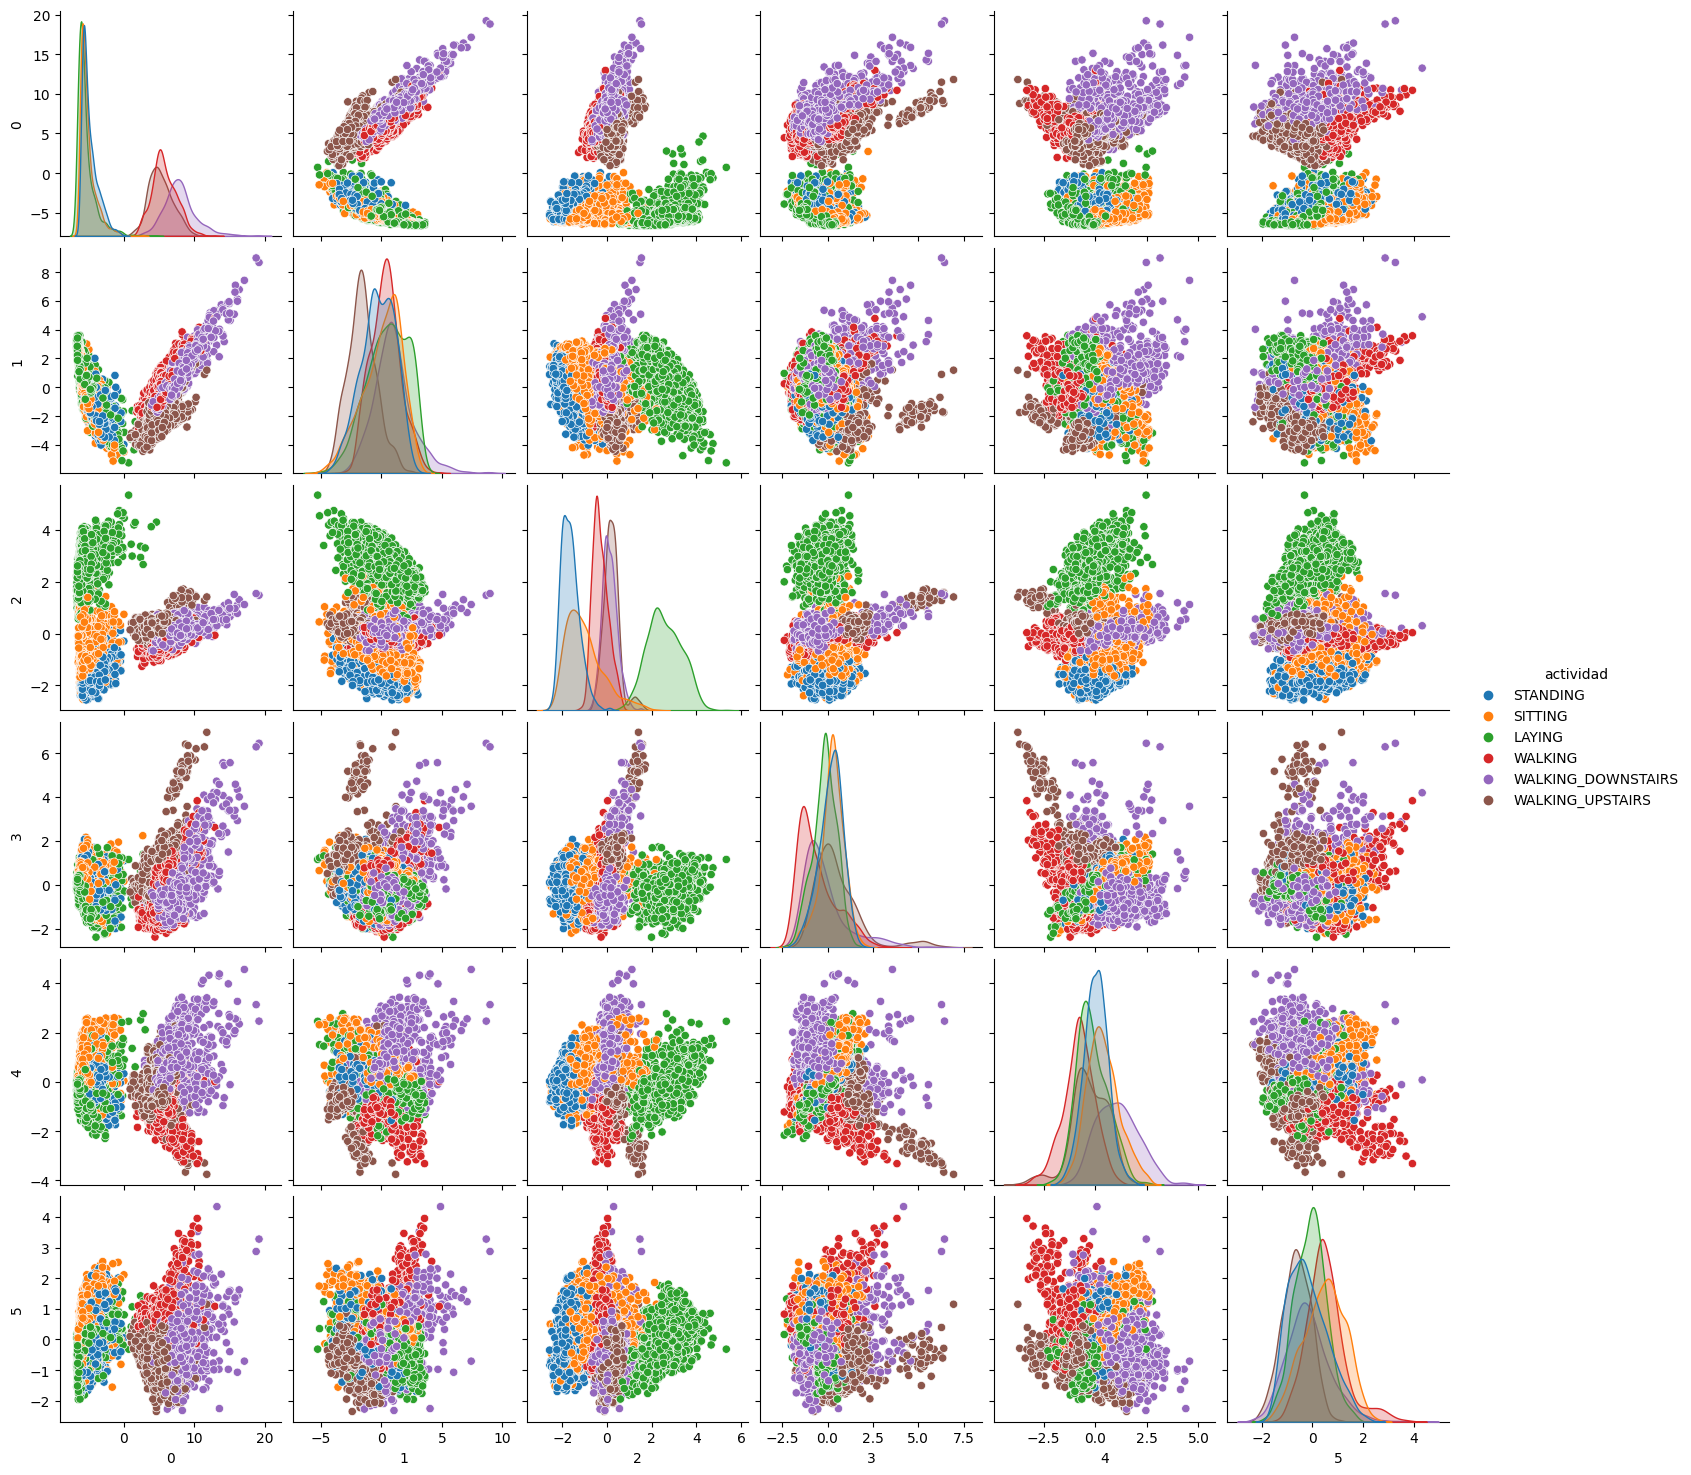

In [21]:
import seaborn as sns
g = sns.pairplot(projected[[0,1,2,3,4,5,'actividad']], hue="actividad")

Si vemos las graficas como una grilla de 5X5 , de la gráfica en (0,0) se tienen los histogramas de los datos en la primera componente principal, se puede ver como hay una clara separación de 2 grupos, aunque dentro de estos dos grupos hay varias clases que se sobreponen. En la grafica (0,1) que corresponde a la componente principal 1 contra la componente principal 2, se ven dos grupos que se pueden separar por una linea horizontal, el primer grupo contiene las etiquetas Standing, Sitting, Laying y el otro grupo contiene las etiquetas Walking, Walking upstairs, Walking Downstairs. En la gráfica (0,2) que muestra el componente 1 contral el componente 3, además de la separación horizontal, se puede ver una ligera separación entre las etiquetas Standing, Sitting, Laying, y de hecho si se observa la gráfica (2,2) que corresponde a  las distribuciones del componente 3, se puede ver como las distribuciones que se sobrelapan en la gráfica (0,0), en este caso estan ligeramente separas, con una separación de distribuciones más evidente para las etiquetas 'standing' y 'laying'. En las gráficas (0,3) y (0,4) sigue habiendo una separación como la mencionada en (0,0), sin embargo las etiquetas 'Walking','Walking upstairs' y 'Walking Downstairs' difieren ligeramente, aunque no lo suficiente a simple vista. Para las otras gráficas los datos no parecen tener una separación clara. Las distribuciones para la componente 4 en (3,3), están un poco mas separadas para el caso de las etiquetas de ' Walking' ,'Walking upstairs' y 'Walking Downstairs', pero en general las distribuciones se sobre ponen, a medida que se aumenta el numero de la componente principal los datos son menos discernibles, es decir su varianza es menor. 

REFERENCIAS

[1] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. 